## Question:

Given a set of two dimensional points P (e.g. [(1.1, 2.5), (3.4,1.9)...]; the size of set can be100s), write a function that calculates simple K-means. The expected returned value from the function is 1) a set of cluster id that each point belongs to, and 2) coordinates of centroids at the end of iteration.

*Although you can write this in any language, we would recommend for you to use python.Please feel free to research and look up any information you need, but please note plagiarism will not be tolerated.You may spend as much time as needed, but as a frame of reference, an hour would be the maximum time frame. If more time is required, please send over the intermediate code at the one hour mark.

You may start the assignment whenever you are ready. Once you have completed this task, **get back to us along with the code and how long it took you**.Please feel free to get in touch with me if you encounter any questions or problems.

### Requirements:

- Minimum: implementation of the k-means function
- Expected: implement an interface similar to sklearn (subset is fine)
- Bonus: test code Bonus: visualization

### Deliverable:
- Can be in any form such as tarball or git repository

### Set-up the environment

In [1]:
pip install kneed

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

### Create a sample two-dimensional points dataset

In [3]:
#Generate synthetic data-set of 2-D points
features, true_labels = make_blobs(n_samples = 300, 
                                   centers= 4,
                                   cluster_std = 2.75,
                                   #random_state=42
                                   )
#Create a pandas Dataframe for intuitive understanding
df = pd.DataFrame(data = features, columns = ['Data_Point_1', 'Data_Point_2'])
df['true_cluster_id'] = true_labels
df.head()
#df.sample(10)

,Data_Point_1,Data_Point_2,true_cluster_id
0,2.235389,-6.075727,1
1,-1.165806,-8.049100,3
2,-10.112354,-0.656551,0
3,4.723534,-7.977904,1
4,1.911945,-3.129356,2


In [4]:
#Check the 2-D points
features[:5]

array([[  2.2353887 ,  -6.07572684],
       [ -1.16580581,  -8.04909993],
       [-10.11235368,  -0.6565507 ],
       [  4.72353373,  -7.97790406],
       [  1.91194502,  -3.12935586]])

In [5]:
#Check the labels assigned to each 2-D points
true_labels[:5]

array([1, 3, 0, 1, 2])

###Create a function calculating k-means

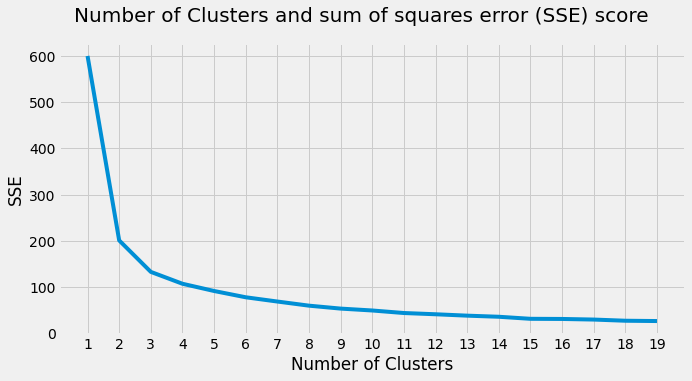

3
   Data Point 1 [X-lab]  Data Point 2 [Y-lab]
0              0.037306             -0.783989
1             -1.372149              1.428200
2              0.942276             -0.151249


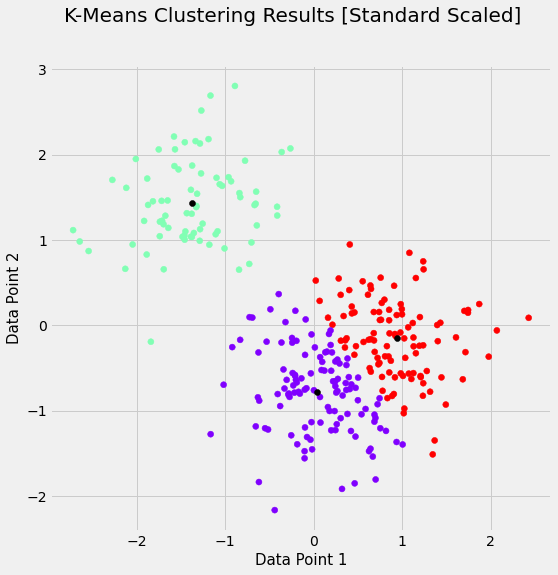

In [21]:
def k_means_clustering(data):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)
  kmeans_kwargs = {"init": "random", 
                  "n_init": 10,
                  "max_iter": 300, 
                  #"random_state": 42,
                  } #A list holds the SSE values for each k
  sse = []
  for k in range(1, 20):
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
  fig = plt.figure(figsize=(10,5))
  plt.style.use("fivethirtyeight") #Plot the optimal number of clusters and sum of squares error (SSE)
  plt.plot(range(1, 20), sse)
  plt.xticks(range(1, 20))
  fig.suptitle('Number of Clusters and sum of squares error (SSE) score', fontsize=20)
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE")
  plt.show()
  kl = KneeLocator(range(1, 20), 
                 sse, curve="convex", 
                 direction="decreasing")
  optimal_n_cluster = kl.elbow
  print(optimal_n_cluster) #Optimal number of clusters
  kmeans = KMeans(init = "random", 
                 n_clusters = optimal_n_cluster,
                 n_init = 10,
                 max_iter = 300,
                 #random_state=42
                 )
  kmeans.fit(scaled_data)
  df_centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['Data Point 1 [X-lab]', 'Data Point 2 [Y-lab]']) 
  print(df_centroids) #Final locations of the centroids for each clusters
  #print(kmeans.labels_)
  fig = plt.figure(figsize=(8,8))
  plt.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_, cmap='rainbow')
  plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
  fig.suptitle('K-Means Clustering Results [Standard Scaled]', fontsize=20)
  plt.xlabel('Data Point 1', fontsize=15)
  plt.ylabel('Data Point 2', fontsize=15)

#Test the K-Means clustering function using a synthetic dataset
k_means_clustering(features)

### Explanotory Codes for the function created above

In [7]:
#Preprocess the data implimenting standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data[:5]

array([[ 0.74484813, -0.44008739],
       [ 0.0734924 , -0.83939319],
       [-1.69245075,  0.65646576],
       [ 1.23597865, -0.82498693],
       [ 0.68100416,  0.15610146]])

#### Choose appropriate number of clusters

In [8]:
kmeans_kwargs = {"init": "random", 
                 "n_init": 10,
                 "max_iter": 300, 
                 #"random_state": 42,
                 }

#A list holds the SSE values for each k
sse = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)

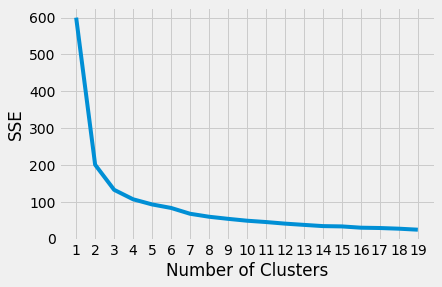

In [9]:
#Plot the optimal number of clusters and sum of squares error (SSE)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
#Identify optimal clusters using the elbow methods
kl = KneeLocator(range(1, 20), 
                 sse, curve="convex", 
                 direction="decreasing")
#Store the most optimal number of clusters into an object
optimal_n_cluster = kl.elbow
optimal_n_cluster

3

#### Impliment K-Means using the estimated appropriate number of clusters

In [11]:
#Create K-means class
kmeans = KMeans(init = "random", 
                 n_clusters = optimal_n_cluster,
                 n_init = 10,
                 max_iter = 300,
                 #random_state=42
                 )

In [12]:
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [13]:
#The lowest SSE value
kmeans.inertia_

132.65424411456598

In [14]:
#Final locations of the centroids for each clusters
kmeans.cluster_centers_

array([[-1.37214888,  1.42819967],
       [ 0.03730587, -0.7839893 ],
       [ 0.94227569, -0.15124941]])

In [15]:
#The number of iterations required to converge
kmeans.n_iter_

7

In [16]:
#Print first 5 predicted labels
kmeans.labels_[:5]
kmeans.labels_

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0,
       2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0,
       0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2], d

In [17]:
#Add the generated cluster classification to the intial dataset
df['pred_cluster_id'] = kmeans.labels_
df

,Data_Point_1,Data_Point_2,true_cluster_id,pred_cluster_id
0,2.235389,-6.075727,1,2
1,-1.165806,-8.049100,3,1
2,-10.112354,-0.656551,0,0
3,4.723534,-7.977904,1,2
4,1.911945,-3.129356,2,2
...,...,...,...,...
295,0.346001,-6.200778,2,1
296,-4.822346,3.836121,0,0
297,-11.711179,5.727511,0,0
298,3.529732,-3.263670,2,2


Text(0, 0.5, 'Data Point 2')

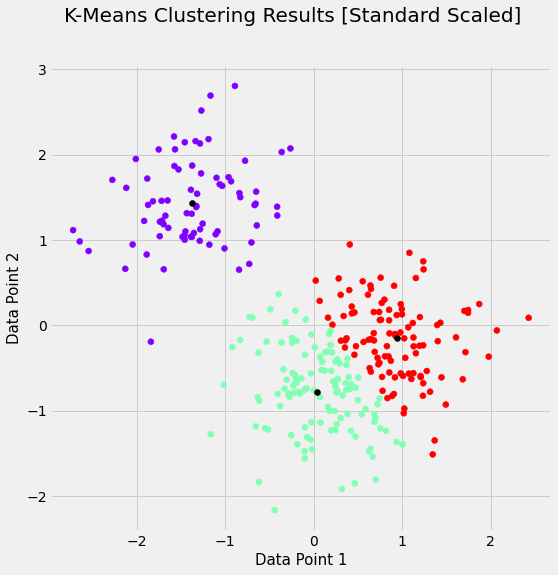

In [18]:
#Create a plot that compares the produced cluster between the original and K-Means based clusters
fig = plt.figure(figsize=(8,8))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
fig.suptitle('K-Means Clustering Results [Standard Scaled]', fontsize=20)
plt.xlabel('Data Point 1', fontsize=15)
plt.ylabel('Data Point 2', fontsize=15)

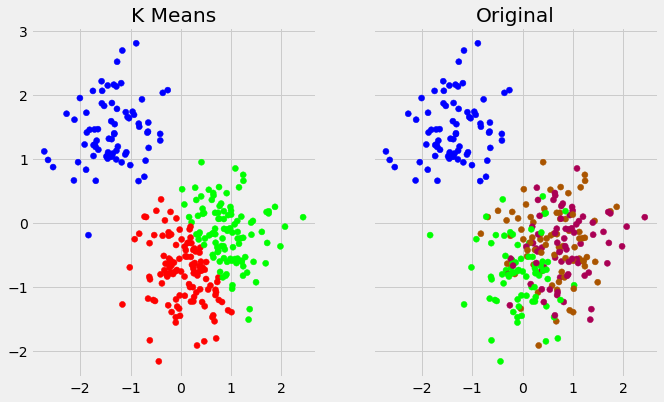

In [19]:
#Plot comparing with original clustering and K-Means clustering
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(scaled_data[:,0], scaled_data[:,1], c = kmeans.labels_, cmap = 'brg')
ax2.set_title("Original")
ax2.scatter(scaled_data[:,0], scaled_data[:,1], c = true_labels, cmap='brg')